In [366]:
# Load datafrom surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
import pandas as pd
import numpy as np
from zipfile import ZipFile
from urllib.request import urlopen   
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [367]:
# Get user rating file
url="https://raw.githubusercontent.com/arindambarman/Datascience/master/Ratings.txt"
ratings=pd.read_csv(url,sep=';',encoding="latin-1")
rating_name=['UserID','ISBN','Rating']
ratings.columns=rating_name
ratings.head()

,UserID,ISBN,Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [370]:
# Get User data file
url="https://raw.githubusercontent.com/arindambarman/Datascience/master/BX-Users.csv"
user=pd.read_csv(url,sep=';',encoding="latin-1")
user_name=['UserID','Location','Age']
user.columns=user_name
user.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [372]:
# Get book data file

URL = 'http://www2.informatik.uni-freiburg.de/~cziegler/BX/BX-CSV-Dump.zip'

# open and save the zip file onto computer
url = urlopen(URL)
output = open('BX-CSV-Dump.zip', 'wb')    # note the flag:  "wb"        
output.write(url.read())
output.close()


with zipfile.ZipFile("BX-CSV-Dump.zip") as z:
   with z.open("BX-Books.csv") as f:
      book = pd.read_csv(f, sep=';',error_bad_lines=False, encoding="latin-1")



os.remove("BX-CSV-Dump.zip") #removes the zip file

book_name=['ISBN','Title','Autho','Year','Publisher','Urls','Urlm','Urll']
book.columns=book_name
book.head(3)


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: Dtyp

,ISBN,Title,Autho,Year,Publisher,Urls,Urlm,Urll
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


95511


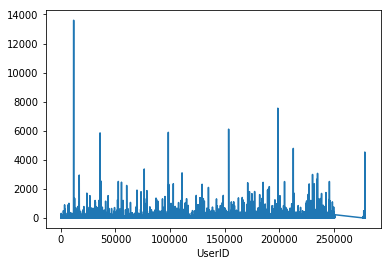

In [373]:
# Carry out data exploration 

print(ratings['UserID'].nunique())

ratings.groupby('UserID')['Rating'].count().plot()


In [374]:
# Analysis for following numbers -# range of ratings  # total no of unqiue books, # number of ratings by book

# range of ratings available (0 to 10)
print(ratings.groupby('Rating')['Rating'].nunique())

# no of Unique books
print(ratings['ISBN'].nunique())


# frequency of different ratings values

print(ratings['Rating'].value_counts())

# zero value could mean no rating and also rejection of the book with very low rating. to avoid confusion those values will be removed

ratings=ratings[ratings.Rating>0]

print(ratings['Rating'].value_counts())

# no of books having more than 25 ratings

Frequency=ratings.groupby('ISBN')['Rating'].count()

print(Frequency[Frequency>25].count())

# no of books having more than 100 ratings


Frequency=ratings.groupby('ISBN')['Rating'].count()

print(Frequency[Frequency>50].count())


Rating
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: Rating, dtype: int64
323410
0     651327
8      95037
10     71813
7      70018
9      62101
5      46953
6      33752
4       8031
3       5445
2       2492
1       1601
Name: Rating, dtype: int64
8     95037
10    71813
7     70018
9     62101
5     46953
6     33752
4      8031
3      5445
2      2492
1      1601
Name: Rating, dtype: int64
1248
441


In [375]:
# Analysi by users - How many users have provided ratings for different books

unique_user=pd.DataFrame(ratings.groupby('UserID').count()['Rating'])

#Number of users who have rated more than 25 times and less than 100
print(unique_user[(unique_user.Rating>25) & (unique_user.Rating<50) ].count())


# Number of users with very high numbers of ratings
print(unique_user[unique_user.Rating>1000].count())


Rating    1325
dtype: int64
Rating    8
dtype: int64


              Rating  Count
ISBN                       
0971880107  4.442966    526
0385504209  8.435556    450
0312195516  8.164306    353
0679781587  8.380795    302
0060928336  7.849315    292
059035342X  8.933333    285
0142001740  8.494700    283
0446672211  8.094340    265
044023722X  7.274131    259


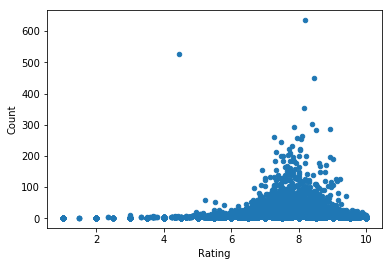

In [376]:
# what is the average rating of books
avg_rating=pd.DataFrame(ratings.groupby('ISBN')['Rating'].mean().sort_values(ascending=False))

# Count of no of ratings for each book
avg_rating['Count']=ratings.groupby('ISBN')['Rating'].count()


#Average ratings of book and no of Ratings available
print(avg_rating.sort_values(by='Count',ascending=False)[1:10])


# Plot data by average rating and count of ratings
avg_rating.plot(kind='scatter',x='Rating',y='Count')

# it can be seen from chart high frequency of ratings are middle of the distribution 



In [377]:
# Identifying users who have rated more than 100
list=ratings['UserID'].value_counts()

# taking only those users who have provided review more than 100 times
Updated_ratings=ratings[ratings['UserID'].isin(list[list>100].index)]


# no of unique users who have rated more than 100 books
print(Updated_ratings['UserID'].nunique())

print(Updated_ratings.shape)

Updated_ratings['UserID'].value_counts().sort_values(ascending=True)[1:10,]

450
(109795, 3)


120093    101
169682    101
36609     101
210035    101
26544     101
225986    101
10560     102
146113    102
235935    102
Name: UserID, dtype: int64

In [378]:
# Now taking the data set with more than 100 user ratings and Doing analysis on the books by number of ratings
print(Updated_ratings.shape)

# Total no of unique book in data set

print(Updated_ratings['ISBN'].nunique())


# no of ratings per book

book_count=Updated_ratings['ISBN'].value_counts()


# filtering the data set only by those books having more than 10 ratings
Final_dataset=Updated_ratings[Updated_ratings['ISBN'].isin(book_count[book_count>10].index)]


# After using the filter following are the number of books in data set

#Final_dataset.groupby('ISBN')['Rating'].count()

# there are books that has only few ratings. those books should be taken out from this  data set
print(Final_dataset['ISBN'].nunique())


Final_dataset['UserID'].value_counts().sort_values(ascending=True)[1:10,]

# no of Unique User in the data set
print(Final_dataset['UserID'].nunique())

# total data set size
print(Final_dataset.shape)

(109795, 3)
75071
437
418
(7060, 3)


10    1690
8     1690
9     1469
7      974
5      630
6      413
4       96
3       48
1       26
2       24
Name: Rating, dtype: int64


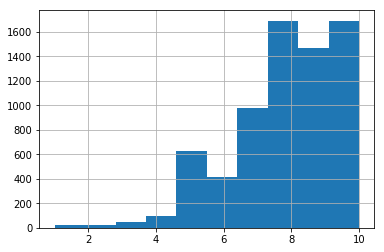

In [379]:
# Analysis of average ratings of books

# distribution of ratings in final dataset 

print(Final_dataset['Rating'].value_counts())


Final_dataset['Rating'].hist(bins=10)


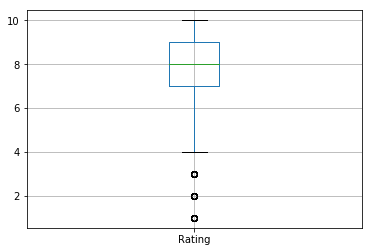

In [380]:
# Creating a boxplot of the rating
Final_dataset.boxplot(column='Rating')


UserID
16795     111
95359      90
104636     75
60244      69
153662     64
6575       59
35859      57
140358     53
158295     49
Name: Rating, dtype: int64

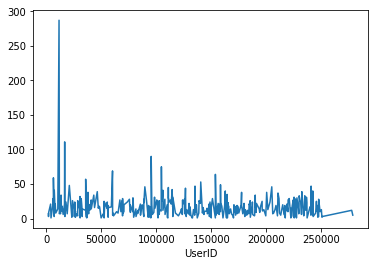

In [381]:
# Continue data exploration 

Final_dataset.groupby('UserID')['Rating'].count().plot()

Final_dataset.groupby('UserID')['Rating'].count().sort_values(ascending=False)[1:10,]

In [382]:
# Creat final data set
Final_dataset.head(10)

,UserID,ISBN,Rating
1456,277427,002542730X,10
1474,277427,0061009059,9
1522,277427,0316776963,8
1581,277427,0385486804,9
1584,277427,0385504209,8
1601,277427,0399501487,9
1647,277427,0440224764,7
1694,277427,0452284449,6
1718,277427,0553280368,9
1776,277427,0679731148,9


In [383]:
# create a pivot table of User and ratings to transform the data to Matrix form

rating_matrix=Final_dataset.pivot(index='UserID',columns='ISBN').Rating
rating_matrix.head()

rating_matrix.shape


(418, 437)

In [384]:
from sklearn import cross_validation as cross_val

# splitting data by train and test set data with 80% and 20% split
train_set, test_set = cross_val.train_test_split(rating_matrix, test_size=0.2)

# splitting data by train and test set data with 90% and 10% split
train_set1, test_set1 = cross_val.train_test_split(rating_matrix, test_size=0.1)

# Creating train data set (80/20)
train_set = pd.DataFrame(train_set)

# Creating train data set (90/10)
train_set1 = pd.DataFrame(train_set1)

# Approach 1: taking mean/median values of a books for all users to replace missing values 
# mean and median value for train data set columns (80/20)
mean_train_set=train_set.mean(axis=1)
median_train_set=train_set.median(axis=1)

# mean and median value for train data set columns (90/10)
mean_train_set1=train_set1.mean(axis=1)
median_train_set1=train_set1.median(axis=1)


# Creating test data set (80/20)
test_set = pd.DataFrame(test_set)

mean_test_set=test_set.mean(axis=1)
median_test_set=test_set.median(axis=1)


# Creating train data set (90/10)
test_set = pd.DataFrame(test_set1)

mean_test_set1=test_set1.mean(axis=1)
median_test_set1=test_set1.median(axis=1)

# remove NA values and replace by Average value
train_set=train_set.transform(lambda x: x.fillna(x.mean(axis=0)))
test_set=test_set.transform(lambda x: x.fillna(x.mean(axis=0)))


train_set1=train_set1.transform(lambda x: x.fillna(x.mean(axis=0)))
test_set1=test_set1.transform(lambda x: x.fillna(x.mean(axis=0)))




# If test set has any NA value as data was plit to train and test, there might not be values  in test set
test_set=test_set.fillna(0)
test_set1=test_set1.fillna(0)




# converting train and test set to array to be used for prediction
train_set_list= np.array(train_set)
test_set_list=np.array(test_set)


train_set_list1= np.array(train_set1)
test_set_list1=np.array(test_set1)

print("Train data" +" ",train_set.shape)
print("Test data" +" ",test_set.shape)

Train data  (334, 437)
Test data  (42, 437)


In [385]:
# Calculate User similarity by using cosine similrity metrics 

from sklearn.metrics.pairwise import pairwise_distances
similarity_user = pairwise_distances(train_set, metric='cosine')

similarity_user1 = pairwise_distances(train_set1, metric='cosine')


In [386]:
# define a function to predict the value of user or item ratings based on similarity measures

def predict(data_set, sim_matrix):
    mean_rating= mean_train_set
    ratings_diff = (data_set - mean_rating[:, np.newaxis])
    pred = mean_rating[:, np.newaxis] + sim_matrix.dot(ratings_diff) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
    return pred

def predict_10(data_set, sim_matrix):
    mean_rating= mean_train_set1
    ratings_diff = (data_set - mean_rating[:, np.newaxis])
    pred = mean_rating[:, np.newaxis] + sim_matrix.dot(ratings_diff) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
    return pred

In [387]:
# user rating prediction based on similarity measures (80/20)
user_rating_prediction=predict(train_set_list, similarity_user)

# user rating prediction based on similarity measures (90/10)
user_rating_prediction1=predict_10(train_set_list1, similarity_user1)


In [388]:
# calculate RMSE for predicted values and actual values
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(prediction, data):
    prediction = prediction[data.nonzero()].flatten()
    dataset = data[data.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, dataset))

In [389]:
# Calculate RMSE (80/20)

RMSE_m_train=RMSE(user_rating_prediction, train_set_list)
RMSE_m=RMSE(user_rating_prediction, test_set_list)


print ('User-based CF RMSE: Train data 80/20 ' + str(RMSE_m_train))

print ('User-based CF RMSE: Test Data 80/20' + str(RMSE_m))


# Calculate RMSE (90/10)

RMSE_m_train_10=RMSE(user_rating_prediction1, train_set_list1)
RMSE_m_10=RMSE(user_rating_prediction1, test_set_list1)


print ('User-based CF RMSE: Train data 90/10 ' + str(RMSE_m_train_10))

print ('User-based CF RMSE: Test Data 90/10 ' + str(RMSE_m_10))


User-based CF RMSE: Train data 80/20 1.2284338390165503
User-based CF RMSE: Test Data 80/201.7360154766748623
User-based CF RMSE: Train data 90/10 1.1859423641781806
User-based CF RMSE: Test Data 90/10 1.933430924932153


In [390]:
# recommendation  based on User and top book values

In [391]:
def predict_top_books(rating, similarity, kind='user', k=40):

    pred = np.zeros(rating.shape)

    if kind == 'user':

        mean = rating.mean(axis=1)

        rating = (rating - mean[:, np.newaxis]).copy()

        for i in range(rating.shape[0]):

            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]

            for j in range(rating.shape[1]):

                pred[i, j] = similarity[i, :][top_k_users].dot(rating[:, j][top_k_users]) 

                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))

        pred += mean[:, np.newaxis]
    return pred  




In [392]:

# data Set 80/20

book_prediction40=predict_top_books(train_set_list, similarity_user, kind='user',k= 40)

book_prediction80=predict_top_books(train_set_list, similarity_user, kind='user', k=80)

book_prediction100=predict_top_books(train_set_list, similarity_user, kind='user', k=100)


# data Set 90/10

book_prediction40_10=predict_top_books(train_set_list1, similarity_user1, kind='user',k= 40)

book_prediction80_10=predict_top_books(train_set_list1, similarity_user1, kind='user', k=80)

book_prediction100_10=predict_top_books(train_set_list1, similarity_user1, kind='user', k=100)



# calculate RMSE (80/20)

RMSE_m_k40=RMSE(book_prediction40, test_set_list)
RMSE_m_k80=RMSE(book_prediction80, test_set_list)
RMSE_m_k100=RMSE(book_prediction100, test_set_list)


print ('User-based CF RMSE: 80/20 ' + str(RMSE_m_k40))

print ('User-based CF RMSE: 80/20' + str(RMSE_m_k80))

print ('User-based CF RMSE: 80/20' + str(RMSE_m_k100))
            
 
# calculate RMSE (90/10)

RMSE_m_k40_10=RMSE(book_prediction40_10, test_set_list1)
RMSE_m_k80_10=RMSE(book_prediction80_10, test_set_list1)
RMSE_m_k100_10=RMSE(book_prediction100_10, test_set_list1)


print ('User-based CF RMSE 90/10: ' + str(RMSE_m_k40))

print ('User-based CF RMSE: 90/10 ' + str(RMSE_m_k80))

print ('User-based CF RMSE: 90/10' + str(RMSE_m_k100))


User-based CF RMSE: 80/20 1.3684748421560506
User-based CF RMSE: 80/201.366616812163134
User-based CF RMSE: 80/201.3667010733794922
User-based CF RMSE 90/10: 1.3684748421560506
User-based CF RMSE: 90/10 1.366616812163134
User-based CF RMSE: 90/101.3667010733794922


In [394]:
# recommendation based on User rating when NA values are replaced by median

In [395]:

# define a function to predict the value of user or item ratings based on similarity measures

def predict_m(data_set, sim_matrix):
    median_rating= median_train_set
    ratings_diff = (data_set - median_rating[:, np.newaxis])
    pred = median_rating[:, np.newaxis] + sim_matrix.dot(ratings_diff) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
    return pred


In [396]:
# user rating prediction based on similarity measures
user_rating_prediction_me=predict_m(train_set_list, similarity_user)

In [397]:
RMSE_me_train=RMSE(user_rating_prediction_me, train_set_list)
RMSE_me=RMSE(user_rating_prediction_me, train_set_list)

print ('User-based CF RMSE: Train data ' + str(RMSE_me_train))

print ('User-based CF RMSE: Test Data ' + str(RMSE_me))


User-based CF RMSE: Train data 1.4507841297819366
User-based CF RMSE: Test Data 1.4507841297819366


In [398]:
def predict_top_books_me(rating, similarity, kind='user', k=40):

    pred = np.zeros(rating.shape)

    if kind == 'user':

        median = median_train_set

        rating = (rating - median[:, np.newaxis]).copy()

        for i in range(rating.shape[0]):

            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]

            for j in range(rating.shape[1]):

                pred[i, j] = similarity[i, :][top_k_users].dot(rating[:, j][top_k_users]) 

                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))

        pred += median[:, np.newaxis]
    return pred  

In [399]:
book_prediction40=predict_top_books_me(train_set_list, similarity_user, kind='user',k= 40)

book_prediction80=predict_top_books_me(train_set_list, similarity_user, kind='user', k=80)

book_prediction100=predict_top_books_me(train_set_list, similarity_user, kind='user', k=100)

# Calculate RMSE

RMSE_me_k40=RMSE(book_prediction40, test_set_list)
RMSE_me_k80=RMSE(book_prediction40, test_set_list)
RMSE_me_k100=RMSE(book_prediction40, test_set_list)


print ('User-based CF RMSE: ' + str(RMSE_me_k40))

print ('User-based CF RMSE: ' + str(RMSE_me_k80))

print ('User-based CF RMSE: ' + str(RMSE_me_k100))

User-based CF RMSE: 2.291713892353061
User-based CF RMSE: 2.291713892353061
User-based CF RMSE: 2.291713892353061


In [400]:
# item based recommendation system

In [401]:
# Collaborative recommendation by using Item matrix

from sklearn import cross_validation as cross_val

# splitting data by train and test set by 80%/20% split
train_set, test_set = cross_val.train_test_split(rating_matrix, test_size=0.2)


# splitting data by train and test set by 90%/10% split
train_set1, test_set1 = cross_val.train_test_split(rating_matrix, test_size=0.10)



# Creating train and test data set(80/20)
train_set = pd.DataFrame(train_set)
mean_train_set=train_set.mean(axis=1)
median_train_set=train_set.median(axis=1)

test_set = pd.DataFrame(test_set)
mean_test_set=test_set.mean(axis=1)
median_test_set=test_set.median(axis=1)

# Creating train and test data set(90/10)
train_set1 = pd.DataFrame(train_set1)
mean_train_set1=train_set1.mean(axis=1)
median_train_set1=train_set1.median(axis=1)

test_set1 = pd.DataFrame(test_set1)
mean_test_set1=test_set1.mean(axis=1)
median_test_set1=test_set1.median(axis=1)



# remove NA values and replace by Average value (80/20)
train_set=train_set.transform(lambda x: x.fillna(x.mean()))

test_set=test_set.transform(lambda x: x.fillna(x.mean()))
test_set=test_set.fillna(0)


# remove NA values and replace by Average value (90/10)
train_set1=train_set1.transform(lambda x: x.fillna(x.mean()))

test_set1=test_set1.transform(lambda x: x.fillna(x.mean()))
test_set1=test_set1.fillna(0)



# converting train and test set to array to be used for prediction (80/20)
train_set_itemlist= np.array(train_set)
test_set_itemlist=np.array(test_set)

# converting train and test set to array to be used for prediction (90/10)
train_set_itemlist1= np.array(train_set1)
test_set_itemlist1=np.array(test_set1)


print("Train data" +" ",train_set.shape)
print("Test data" +" ",test_set.shape)

Train data  (334, 437)
Test data  (84, 437)


In [402]:
# Item similarity for data set 1(80/20)

from sklearn.metrics.pairwise import pairwise_distances
similarity_item = pairwise_distances(train_set_itemlist, metric='cosine')

# Item similarity for data set 2(90/10)
from sklearn.metrics.pairwise import pairwise_distances
similarity_item1 = pairwise_distances(train_set_itemlist1, metric='cosine')


In [403]:
#Prediction based on item set(80/20)

item_rating_prediction = train_set_itemlist.T.dot(similarity_item) / np.array([np.abs(similarity_item).sum(axis=1)])

#Prediction based on item set(90/10)

item_rating_prediction1 = train_set_itemlist1.T.dot(similarity_item1) / np.array([np.abs(similarity_item1).sum(axis=1)])

In [404]:
# calculate RMSE (80/20)

RMSE_Im_train=RMSE(item_rating_prediction, train_set_itemlist.T)
RMSE_Im=RMSE(item_rating_prediction, test_set_itemlist.T)

print ('User-based CF RMSE_train set 80/20: ' + str(RMSE_Im_train))
print('User-based CF RMSE_Test set 80/20: ' +  str(RMSE_Im))

# calculate RMSE (90/10)

RMSE_Im_train_10=RMSE(item_rating_prediction1, train_set_itemlist1.T)
RMSE_Im_10=RMSE(item_rating_prediction1, test_set_itemlist1.T)

print ('User-based CF RMSE_train set 90/10: ' + str(RMSE_Im_train_10))
print('User-based CF RMSE_Test set 90/10: ' +  str(RMSE_Im_10))

User-based CF RMSE_train set 80/20: 0.31615438701709114
User-based CF RMSE_Test set 80/20: 1.0958003349318446
User-based CF RMSE_train set 90/10: 0.32764384029694615
User-based CF RMSE_Test set 90/10: 1.3658595150798136


In [405]:
def predict_topk_books(ratings,similarity,k=40):

    pred = np.zeros(ratings.T.shape)
    
    mean = mean_train_set

    ratings = (ratings.T - mean[np.newaxis, :]).copy()
    
    for j in range(ratings.shape[1]):

        top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
        
        for i in range(ratings.shape[0]):

            pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items]) 

            pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))

    pred += mean[np.newaxis, :]
    
    return pred  

In [406]:
def predict_topk_books_10(ratings,similarity,k=40):

    pred = np.zeros(ratings.T.shape)
    
    mean = mean_train_set1

    ratings = (ratings.T - mean[np.newaxis, :]).copy()
    
    for j in range(ratings.shape[1]):

        top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
        
        for i in range(ratings.shape[0]):

            pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items]) 

            pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))

    pred += mean[np.newaxis, :]
    
    return pred  

In [407]:
# set (80/20)
item_prediction_m20=predict_topk_books(train_set_itemlist, similarity_item, k=40)

item_prediction_m40=predict_topk_books(train_set_itemlist, similarity_item, k=40)

item_prediction_m100=predict_topk_books(train_set_itemlist, similarity_item, k=100)

#set (90/10)

item_prediction_m20_10=predict_topk_books_10(train_set_itemlist1, similarity_item1, k=40)

item_prediction_m40_10=predict_topk_books_10(train_set_itemlist1, similarity_item1, k=40)

item_prediction_m100_10=predict_topk_books_10(train_set_itemlist1, similarity_item1, k=100)



In [408]:

# Calculate RMSE related to item recommendation

# Calculate RMSE set (80/20)

RMSE_Im_40=RMSE(book_prediction40, test_set_list)
RMSE_Im_80=RMSE(book_prediction80, test_set_list)
RMSE_Im_100=RMSE(book_prediction100, test_set_list)


print ('User-based CF RMSE 80/20: ' + str(RMSE_Im_40))

print ('User-based CF RMSE 80/20  :' + str(RMSE_Im_80))

print ('User-based CF RMSE 80/20 : ' + str(RMSE_Im_100))


# Calculate RMSE set (90/10)

RMSE_Im_40_10=RMSE(item_prediction_m20_10, test_set_list1.T)
RMSE_Im_80_10=RMSE(item_prediction_m40_10, test_set_list1.T)
RMSE_Im_100_10=RMSE(item_prediction_m100_10, test_set_list1.T)


print ('User-based CF RMSE 90/10: ' + str(RMSE_Im_40_10))

print ('User-based CF RMSE 90/10  :' + str(RMSE_Im_80_10))

print ('User-based CF RMSE 90/10 : ' + str(RMSE_Im_100_10))

RMSE(item_prediction_m20_10, test_set_list1.T)


User-based CF RMSE 80/20: 2.291713892353061
User-based CF RMSE 80/20  :2.054901266097125
User-based CF RMSE 80/20 : 1.9985528418589744
User-based CF RMSE 90/10: 2.32013697538
User-based CF RMSE 90/10  :2.32013697538
User-based CF RMSE 90/10 : 2.1910697180495933


2.32013697538

In [409]:
# Prediction based on median values

In [410]:
def predict_topk_books(ratings,similarity,k=40):

    pred = np.zeros(ratings.T.shape)
    
    mean = median_train_set

    ratings = (ratings.T - mean[np.newaxis, :]).copy()
    
    for j in range(ratings.shape[1]):

        top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
        
        for i in range(ratings.shape[0]):

            pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items]) 

            pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))

    pred += mean[np.newaxis, :]
    
    return pred  

In [411]:
item_prediction_me20=predict_topk_books(train_set_itemlist, similarity_item, k=40)

item_prediction_me40=predict_topk_books(train_set_itemlist, similarity_item, k=40)

item_prediction_me100=predict_topk_books(train_set_itemlist, similarity_item, k=100)

In [412]:
# Calculate RMSE

RMSE_Ime_20=RMSE(item_prediction_me20, test_set_itemlist.T)
RMSE_Ime_40=RMSE(item_prediction_me40, test_set_itemlist.T)
RMSE_Ime_100=RMSE(item_prediction_me100, test_set_itemlist.T)


print('User-based CF RMSE: ' + str(RMSE_Ime_20))

print('User-based CF RMSE: ' + str(RMSE_Ime_40))

print('User-based CF RMSE: ' + str(RMSE_Ime_100))

User-based CF RMSE: 2.1574862186983284
User-based CF RMSE: 2.1574862186983284
User-based CF RMSE: 1.943866016348021


In [413]:
# SVD collaboration

In [414]:
def RMSE(prediction, data):
    prediction = prediction[data.nonzero()].flatten()
    dataset = data[data.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, dataset))

In [415]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds


#get SVD components from train matrix. k=10 ( 20% split data)
user_fea, singular_val, item_fea = svds(train_set, k = 10)
s_diag_matrix=np.diag(singular_val)
pred_SVD10 = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)


RMSE_SVD10=RMSE(pred_SVD10, test_set_list)

print ('User-based CF MSE test k10: ' + str(RMSE_SVD10))

#get SVD components from train matrix. k=10 ( 10% split data)
user_fea, singular_val, item_fea = svds(train_set1, k = 10)
s_diag_matrix=np.diag(singular_val)
pred_SVD10_i = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)


RMSE_SVD10_i=RMSE(pred_SVD10_i, test_set_list1)

print ('User-based CF MSE test k10@ 10% data: ' + str(RMSE_SVD10_i))

#get SVD components from train matrix. Choose k=20
user_fea, singular_val, item_fea = svds(train_set, k = 20)
s_diag_matrix=np.diag(singular_val)
pred_SVD20 = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)
pred_SVD20.shape

RMSE_SVD20=RMSE(pred_SVD20, test_set_list)

print ('User-based CF MSE train k20: ' + str(RMSE_SVD20))


#get SVD components from train matrix. Choose k=20 @ 10% split
user_fea, singular_val, item_fea = svds(train_set1, k = 20)
s_diag_matrix=np.diag(singular_val)
pred_SVD20_i = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)


RMSE_SVD20_i=RMSE(pred_SVD20_i, test_set_list1)

print ('User-based CF MSE train k20@ 10% split: ' + str(RMSE_SVD20_i))



#get SVD components from train matrix. Choose k=25
user_fea, singular_val, item_fea = svds(train_set, k = 25)
s_diag_matrix=np.diag(singular_val)
pred_SVD25 = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)


RMSE_SVD25=RMSE(pred_SVD25, test_set_list)
print ('User-based CF MSE train k25: ' + str(RMSE_SVD25))


#get SVD components from train matrix. Choose k=25 @ 10% split data
user_fea, singular_val, item_fea = svds(train_set1, k = 25)
s_diag_matrix=np.diag(singular_val)
pred_SVD25_i = np.dot(np.dot(user_fea, s_diag_matrix), item_fea)


RMSE_SVD25_i=RMSE(pred_SVD25_i, test_set_list1)
print ('User-based CF MSE train k25@ 10% split: ' + str(RMSE_SVD25_i))


User-based CF MSE test k10: 1.3832865705462754
User-based CF MSE test k10@ 10% data: 1.3699966616587131
User-based CF MSE train k20: 1.3898485255360673
User-based CF MSE train k20@ 10% split: 1.3760019545926503
User-based CF MSE train k25: 1.3912127579152032
User-based CF MSE train k25@ 10% split: 1.3773046168212921


In [416]:
# Create list for Chart

In [417]:
# create the user list train and test data split 20%
User_Lm=[RMSE_m,RMSE_m_k40,RMSE_m_k80,RMSE_m_k100]

User_Lme=[RMSE_me,RMSE_me_k40,RMSE_me_k80,RMSE_me_k100]

# creating list for train and test data split 10%
User_Lm_10=[RMSE_m_10,RMSE_m_k40_10,RMSE_m_k80_10,RMSE_m_k100_10]

#User_Lme_10=[RMSE_me_10,RMSE_me_k40_10,RMSE_me_k80_10,RMSE_me_k100_10]



# create the user item list train and test data split 20%

Item_Lm=[RMSE_Im,RMSE_Im_40,RMSE_Im_80,RMSE_Im_100]

Item_Lme=[RMSE_Im,RMSE_Ime_20,RMSE_Ime_40,RMSE_Ime_100]



# creating list for train and test data split 10%

Item_Lm_10=[RMSE_Im_10,RMSE_Im_40_10,RMSE_Im_80_10,RMSE_Im_100_10]

#Item_Lme_10=[RMSE_Im_10,RMSE_Ime_20_10,RMSE_Ime_40_10,RMSE_Ime_100_10]


# create the user item list for SVD test data split 20%

RMSE_SVD=[RMSE_SVD10,RMSE_SVD10,RMSE_SVD20,RMSE_SVD25]

# create the user item list for SVD test data split 10%
RMSE_SVD_10=[RMSE_SVD10_i,RMSE_SVD10_i,RMSE_SVD20_i,RMSE_SVD25_i]

print(User_Lm,User_Lme,Item_Lm,Item_Lme)

List_20={'RMSE_m': User_Lm,'RMSE_me':User_Lme,'Item_Lm': Item_Lm,'Item_Lme': Item_Lme,'RMSE_SVD':RMSE_SVD }

List_10={'RMSE_m_10': User_Lm_10,'Item_Lm_10': Item_Lm_10,'RMSE_SVD10':RMSE_SVD_10 }

List_RMSE_20=pd.DataFrame(List_20)

List_RMSE_10=pd.DataFrame(List_10)

print(List_RMSE_10)

print(List_RMSE_20)

[1.7360154766748623, 1.3684748421560506, 1.366616812163134, 1.3667010733794922] [1.4507841297819366, 2.291713892353061, 2.291713892353061, 2.291713892353061] [1.0958003349318446, 2.291713892353061, 2.054901266097125, 1.9985528418589744] [1.0958003349318446, 2.1574862186983284, 2.1574862186983284, 1.943866016348021]
   Item_Lm_10  RMSE_SVD10  RMSE_m_10
0    1.365860    1.369997   1.933431
1    2.320137    1.369997   1.556852
2    2.320137    1.376002   1.553870
3    2.191070    1.377305   1.553001
    Item_Lm  Item_Lme  RMSE_SVD    RMSE_m   RMSE_me
0  1.095800  1.095800  1.383287  1.736015  1.450784
1  2.291714  2.157486  1.383287  1.368475  2.291714
2  2.054901  2.157486  1.389849  1.366617  2.291714
3  1.998553  1.943866  1.391213  1.366701  2.291714


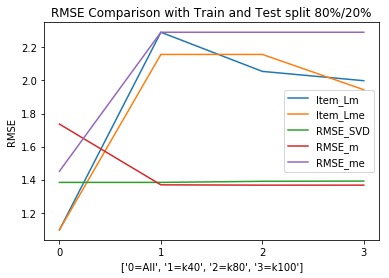

In [418]:
x=['0=All','1=k40','2=k80','3=k100']

y=List_RMSE_20.plot()
y.set_xlabel(x)
y.set_ylabel('RMSE')
y.set_title('RMSE Comparison with Train and Test split 80%/20%')
y.set_xticks([0,1,2,3])

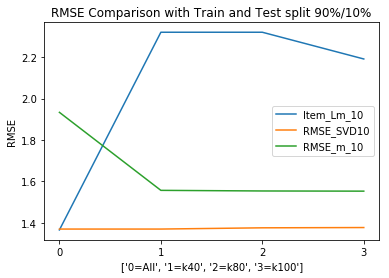

In [419]:
z=['0=All','1=k40','2=k80','3=k100']
x=List_RMSE_10.plot()
x.set_xlabel(z)
x.set_ylabel('RMSE')
x.set_title('RMSE Comparison with Train and Test split 90%/10%')
x.set_xticks([0,1,2,3])

In [420]:
# Use the selected model to recommend books

In [421]:
book_list=pd.DataFrame(pred_SVD20)

# assign column name as the ISBN No
col=train_set.columns.values
book_list.columns=col

# set index
row_index=train_set.index
book_list['index_col'] = row_index
book_list.head()



,002542730X,0060392452,0060502258,0060915544,0060920084,0060928336,0060929871,0060930535,0060934417,0060938455,...,155874262X,1558743669,1558744150,1558745157,1573225789,1573229326,1573229725,1592400876,1878424319,index_col
0,7.678271,8.536591,7.617729,8.664231,7.988385,8.121890,7.101251,7.475601,8.444029,8.103158,...,8.367264,7.482038,7.370301,7.713740,8.273134,6.599887,8.993500,8.797424,6.128316,56271
1,7.658432,8.530060,7.607385,8.619408,8.009170,8.133905,7.105249,7.480344,8.387558,8.114078,...,8.392908,7.412127,7.387852,7.680719,8.283307,6.618721,9.004178,8.792802,6.226292,32440
2,7.685337,8.573492,7.662559,8.669370,8.023439,8.156590,7.046198,7.548312,8.468860,8.134960,...,8.357465,7.464087,7.338925,7.697813,8.300843,6.606695,9.009785,8.815010,6.141444,26583
3,7.638244,8.479506,7.562695,8.598589,7.980164,8.085078,7.154639,7.521656,8.323531,8.079204,...,8.476775,7.462895,7.253215,7.690312,8.286217,6.530444,8.961807,8.768581,6.286452,164323
4,7.496503,8.563270,7.580995,8.872168,8.049149,8.234878,6.986330,7.033181,8.810336,8.105282,...,8.698156,7.336837,7.820130,7.762857,8.238860,6.526761,8.978908,8.784575,6.250694,35836


In [422]:
# select based on user model will provide the top list of books.

def Recommendation_for_user(user_Id):
    x=int(user_Id)
    top_books=book_list[test.index_col==x].T
    top_list=top_books.iloc[:,0].sort_values(ascending=False)[1:10]
    x=top_list.index
    LIST=book[book.ISBN.isin(x)]
    return LIST   

Recommendation_for_user('35857')


,ISBN,Title,Autho,Year,Publisher,Urls,Urlm,Urll
388,0156528207,The Little Prince,Antoine de Saint-ExupÃ©ry,1968,Harcourt,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...,http://images.amazon.com/images/P/0156528207.0...
3847,0064400557,Charlotte's Web (Trophy Newbery),E. B. White,1974,HarperTrophy,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...,http://images.amazon.com/images/P/0064400557.0...
5898,0553274295,Where the Red Fern Grows,Wilson Rawls,1984,Random House Children's Books,http://images.amazon.com/images/P/0553274295.0...,http://images.amazon.com/images/P/0553274295.0...,http://images.amazon.com/images/P/0553274295.0...
7732,0446365386,Gone with the Wind,Margaret Mitchell,1993,Warner Books,http://images.amazon.com/images/P/0446365386.0...,http://images.amazon.com/images/P/0446365386.0...,http://images.amazon.com/images/P/0446365386.0...
12762,0618002235,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...,http://images.amazon.com/images/P/0618002235.0...
12763,0618002227,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,1999,Houghton Mifflin Company,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...,http://images.amazon.com/images/P/0618002227.0...
15181,0836218051,The Essential Calvin and Hobbes,Bill Watterson,1988,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836218051.0...,http://images.amazon.com/images/P/0836218051.0...,http://images.amazon.com/images/P/0836218051.0...
29729,006440188X,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
31978,0684814994,Christmas Box (Christmas Box Trilogy),Richard Paul Evans,1995,Simon &amp; Schuster,http://images.amazon.com/images/P/0684814994.0...,http://images.amazon.com/images/P/0684814994.0...,http://images.amazon.com/images/P/0684814994.0...


In [423]:
ratings.groupby('ISBN')['Rating'].mean()[['0836218051','0156528207','0618002219','0064400557','0553274295','0140143505','0618002235','0836218051','006440188X']]


ISBN
0836218051    9.000000
0156528207    8.978723
0618002219    8.972222
0064400557    9.166667
0553274295    8.592593
0140143505    9.560000
0618002235    9.708333
0836218051    9.000000
006440188X    9.157895
Name: Rating, dtype: float64

In [424]:
Recommend_books('The Hobbit: or There and Back Again')

2785    The Hobbit: or There and Back Again
Name: Title, dtype: object

In [188]:
# select book based on user input of book it brings similar users

book_list['0060392452'].sort_values(ascending=False)[1:10]

257    9.217497
283    9.082469
59     9.077356
44     9.065194
232    9.048313
218    9.038334
284    9.003752
124    8.995690
7      8.995378
Name: 0060392452, dtype: float64